In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate


## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## load the file

In [3]:
df=pd.read_excel("adobe_dataset_cleaned_train.xlsx")

In [4]:
df.head()

,date,likes,content,username,media,inferred company,cleaned_hashtags,media_type
0,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,TimHortonsPH,Photo
1,2018-06-30 10:04:20,2750,Watch rapper freestyle for over an HOUR,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,no_tags,Photo
2,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,no_tags,Photo
3,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,no_tags,Photo
4,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of ! She was...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,excellenceisworththeeffort,Photo


## Summary statistics for 'likes' column

In [5]:
# Check the data type of the 'likes' column after conversion
print(df['likes'].dtype)

# Display the summary statistics for the 'likes' column
print(df['likes'].describe())


int64
count    300000.000000
mean        773.364793
std        4931.463419
min           0.000000
25%           3.000000
50%          76.000000
75%         364.000000
max      560193.000000
Name: likes, dtype: float64


##  Frequency counts for top 10 'inferred company'

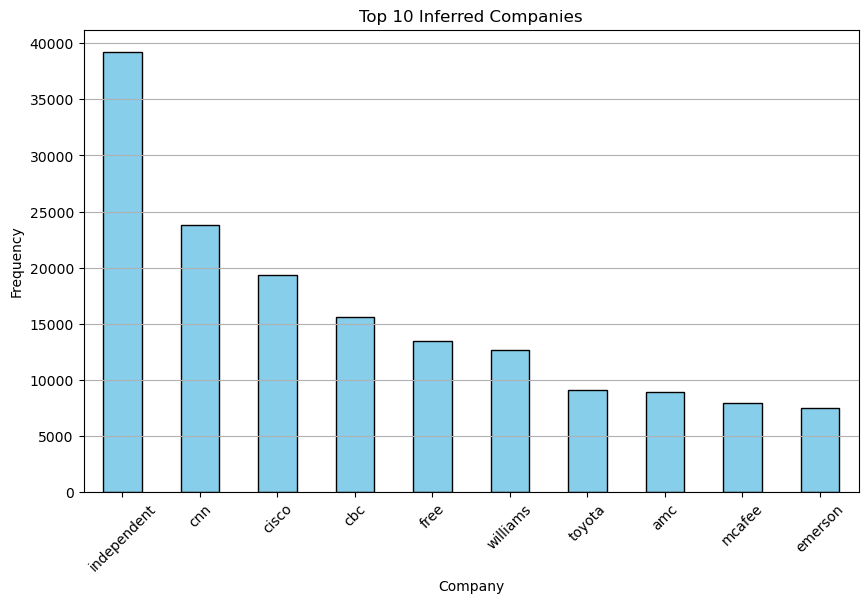

In [17]:
# Compute frequency counts for 'inferred company'
company_counts = df['inferred company'].value_counts()

# Select top 10 companies
top_10_companies = company_counts.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Inferred Companies')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##  Frequency counts for top 10 'usernames'

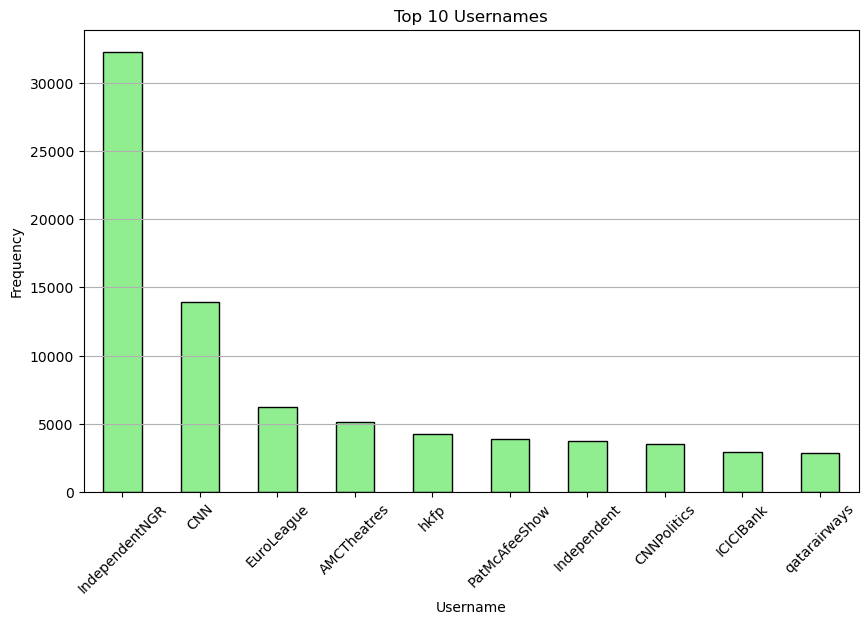

In [7]:
# Compute frequency counts for 'username'
username_counts = df['username'].value_counts()

# Select top 10 usernames
top_10_usernames = username_counts.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top_10_usernames.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Usernames')
plt.xlabel('Username')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##  Frequency counts for 'media type'

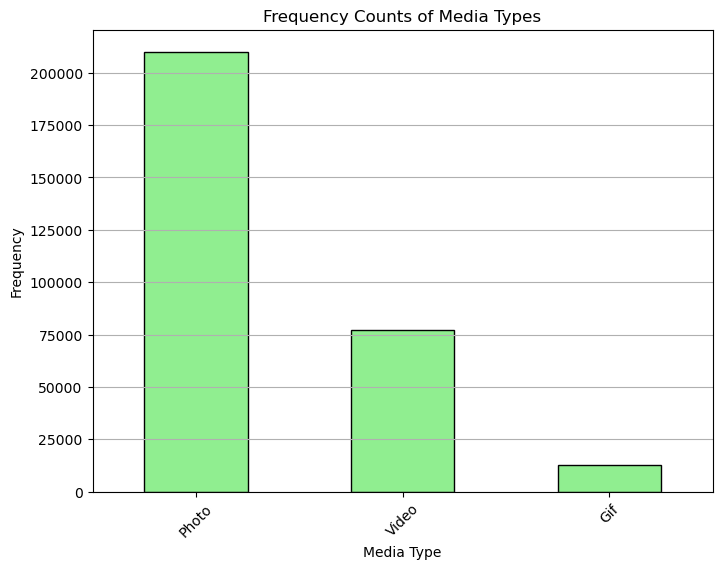

In [8]:
# Compute frequency counts for 'media_type'
media_counts = df['media_type'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
media_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequency Counts of Media Types')
plt.xlabel('Media Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##  Frequency counts for top 10 'hashtags'

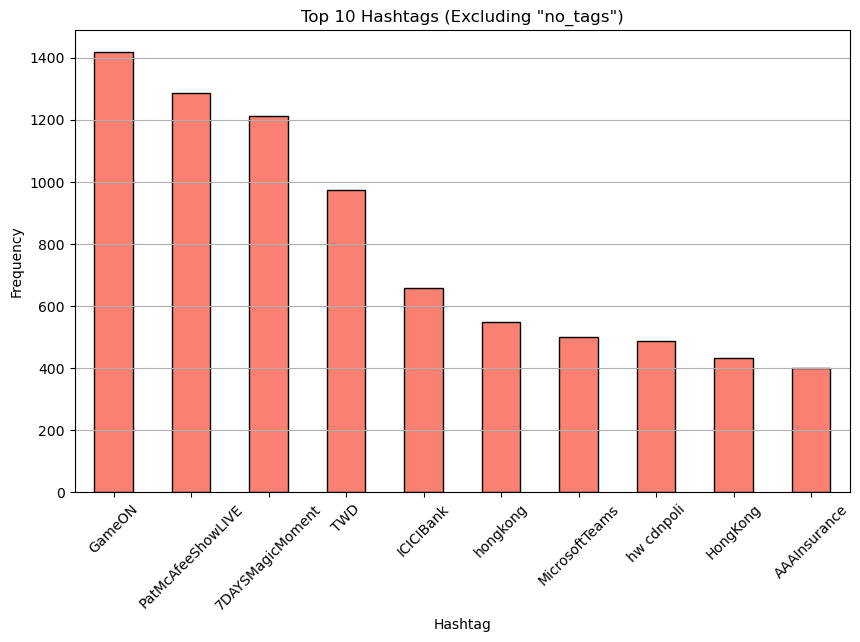

In [20]:
# Exclude "no_tags" from the dataset
df_filtered = df[df['cleaned_hashtags'] != 'no_tags']

# Compute frequency counts for hashtags
hashtag_counts = df_filtered['cleaned_hashtags'].value_counts()

# Select top 10 hashtags
top_10_hashtags = hashtag_counts.head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top_10_hashtags.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Hashtags (Excluding "no_tags")')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Change in no of likes as per years (the scale of total likes is in le8)

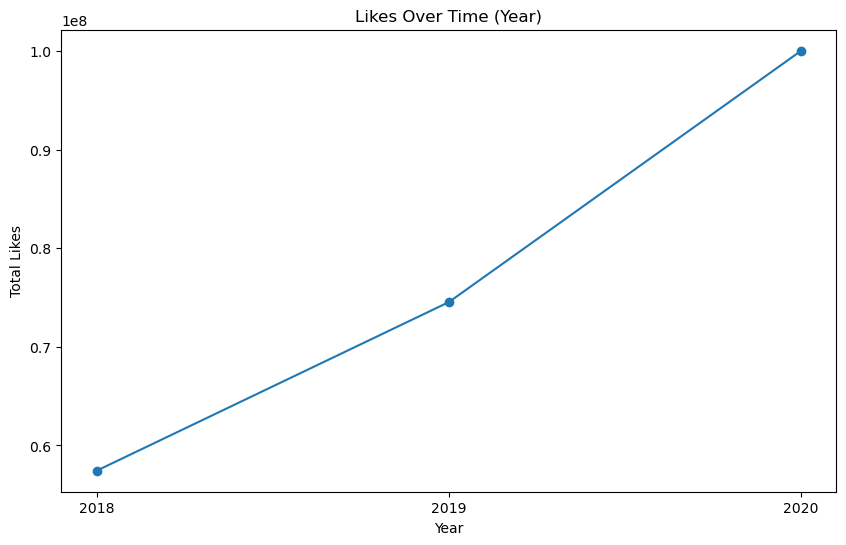

In [22]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and calculate total likes for each year
likes_by_year = df.groupby('year')['likes'].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(likes_by_year.index, likes_by_year.values, marker='o', linestyle='-')
plt.title('Likes Over Time (Year)')
plt.xlabel('Year')
plt.ylabel('Total Likes')
plt.xticks(likes_by_year.index)
plt.show()

## Change in no of likes w.r.t months in each year

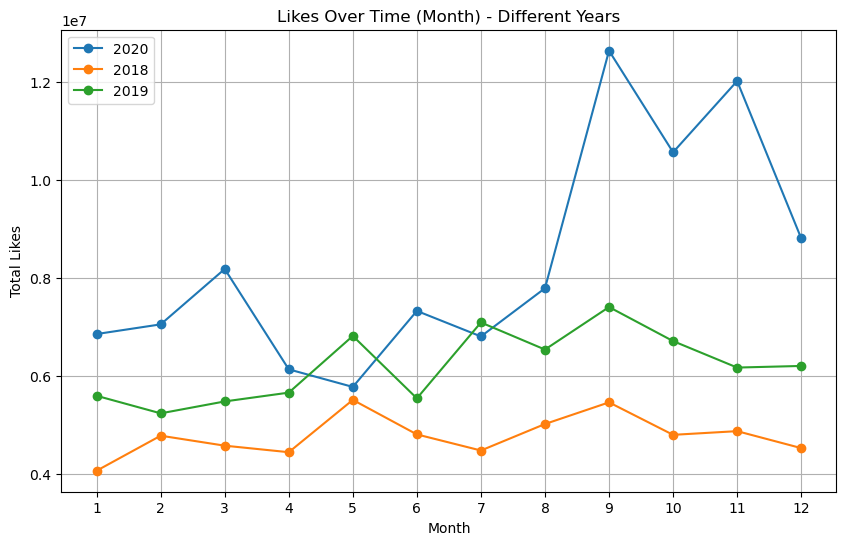

In [23]:
# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month and calculate total likes for each month
likes_by_year_month = df.groupby(['year', 'month'])['likes'].sum()

# Plot the line graph with different colored lines for different years
plt.figure(figsize=(10, 6))
for year in df['year'].unique():
    likes_year = likes_by_year_month[year]
    plt.plot(likes_year.index, likes_year.values, marker='o', linestyle='-', label=year)

plt.title('Likes Over Time (Month) - Different Years')
plt.xlabel('Month')
plt.ylabel('Total Likes')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

## TOP 10 Most liked tweets in the dataset

In [12]:
# Sort the dataframe by 'likes' column in descending order and select the top 10 rows
top_10_performing_content = df.sort_values(by='likes', ascending=False).head(10)

# Display the top 10 performing content in tabular format
print("Top 10 Performing Content:")
print(tabulate(top_10_performing_content[['date', 'likes', 'content', 'username', 'inferred company']], headers='keys', tablefmt='psql'))


Top 10 Performing Content:
+--------+---------------------+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+--------------------+
|        | date                |   likes | content                                                                                                                                                        | username       | inferred company   |
|--------+---------------------+---------+----------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+--------------------|
| 275726 | 2019-05-06 12:58:00 |  560193 | ⚠️ SPOILERS AHEAD ⚠️ It’s time to step up. Watch the new SpiderManFarFromHome trailer now and get your tickets today:                                          | SpiderManMovie | no                 |
| 225

## TOP 10 Most liked usernames

In [13]:
# Calculate mean likes for each username 
username_mean_likes = df.groupby('username')['likes'].mean().reset_index()

# Sort the mean likes in descending order and select the top 10
top_10_usernames = username_mean_likes.sort_values(by='likes', ascending=False).head(10)


# Display the top 10 usernames and inferred companies based on mean likes in tables
print("Top 10 Usernames by Mean Likes:")
print(tabulate(top_10_usernames, headers='keys', tablefmt='psql'))


Top 10 Usernames by Mean Likes:
+------+-----------------+---------+
|      | username        |   likes |
|------+-----------------+---------|
| 1466 | SpotifyNews     | 67173.5 |
| 1284 | RedBullSalzburg | 53706   |
| 2275 | pumakorea       | 44171.5 |
| 2237 | offclASTRO      | 29754.6 |
| 1022 | MichelleHux     | 28627.9 |
|  550 | FCBarcelona     | 28532.6 |
| 1536 | Tesla           | 28193.9 |
|  551 | FCBarcelona_es  | 26758.4 |
| 1467 | SpotifySG       | 23735.9 |
| 1448 | SnottieDrippen  | 23119   |
+------+-----------------+---------+


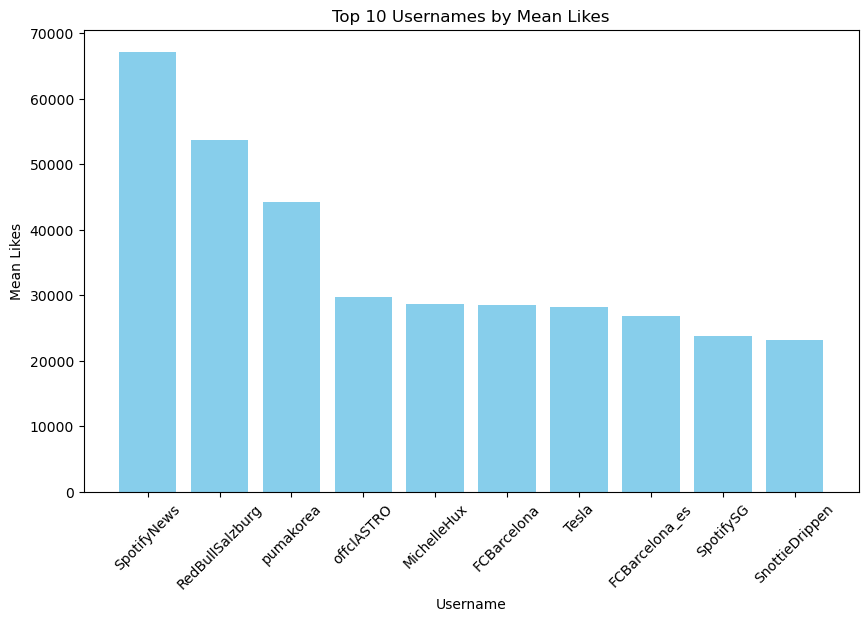

In [14]:
# Visualize the top 10 usernames based on mean likes
plt.figure(figsize=(10, 6))
plt.bar(top_10_usernames['username'], top_10_usernames['likes'], color='skyblue')
plt.xlabel('Username')
plt.ylabel('Mean Likes')
plt.title('Top 10 Usernames by Mean Likes')
plt.xticks(rotation=45)
plt.show()

## TOP 10 Most liked company

In [17]:
# Calculate mean likes for each inferred company
company_mean_likes = df.groupby('inferred company')['likes'].mean().reset_index()

# Sort the mean likes in descending order and select the top 10
top_10_companies = company_mean_likes.sort_values(by='likes', ascending=False).head(10)

print("\nTop 10 Inferred Companies by Mean Likes:")
print(tabulate(top_10_companies, headers='keys', tablefmt='psql'))


Top 10 Inferred Companies by Mean Likes:
+-----+--------------------+----------+
|     | inferred company   |    likes |
|-----+--------------------+----------|
|  63 | fc barcelona       | 28486.8  |
| 180 | stryker            | 18076.6  |
| 187 | tesla              | 17794    |
|  77 | gucci              | 14273    |
| 176 | spotify            | 13793.8  |
| 106 | louis vuitton      | 11386.8  |
| 197 | twitter            | 10259.9  |
| 131 | oakley             |  8575.7  |
|  38 | chanel             |  5959.47 |
| 161 | saab               |  5157.7  |
+-----+--------------------+----------+


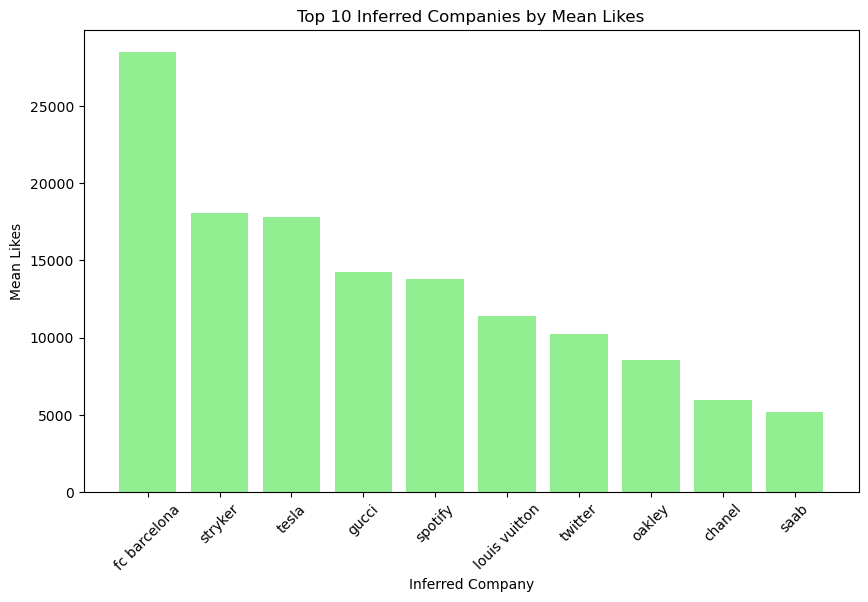

In [18]:
# Visualize the top 10 inferred companies based on mean likes
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies['inferred company'], top_10_companies['likes'], color='lightgreen')
plt.xlabel('Inferred Company')
plt.ylabel('Mean Likes')
plt.title('Top 10 Inferred Companies by Mean Likes')
plt.xticks(rotation=45)
plt.show()

## Relationship between word count and likes

In [19]:
# Calculate the number of words in the 'content' column
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Display the content length statistics
print("Content Length Analysis:")
print(df[['content', 'word_count']].head())


Content Length Analysis:
                                             content  word_count
0  Spend your weekend morning with a Ham, Egg, an...          28
1         Watch rapper  freestyle for over an HOUR             7
2  Canadian Armenian community demands ban on mil...          12
3  1st in Europe to be devastated by COVID-19, It...          20
4  Congratulations to Pauletha Butts of ! She was...          25


In [20]:
# Analyze the relationship between content length and likes
correlation = df[['word_count', 'likes']].corr(method='pearson')

print("\nCorrelation between Content Length and Likes:")
print(correlation)



Correlation between Content Length and Likes:
            word_count     likes
word_count    1.000000 -0.001455
likes        -0.001455  1.000000


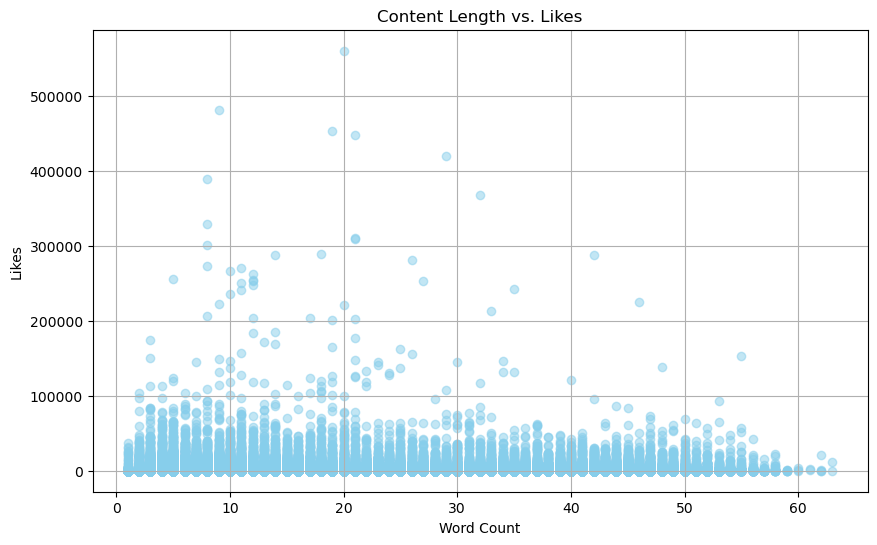

In [21]:
# Scatter plot of content length (word count) vs. likes
plt.figure(figsize=(10, 6))
plt.scatter(df['word_count'], df['likes'], color='skyblue', alpha=0.5)
plt.title('Content Length vs. Likes')
plt.xlabel('Word Count')
plt.ylabel('Likes')
plt.grid(True)
plt.show()
